In [1]:
pip install numpy matplotlib scipy qutip

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import pickle

# ---------------------------
# Load the noisy Wigner function
# ---------------------------
file_path = "noisy_wigner_0.pickle"  # Update if necessary
with open(file_path, "rb") as f:
    loaded_data = pickle.load(f)

# Print the type of the loaded data and its structure.
print("Type of loaded_data:", type(loaded_data))
if isinstance(loaded_data, tuple):
    for i, item in enumerate(loaded_data):
        print(f"Element {i} type: {type(item)}, shape: {np.array(item).shape}")
    # Assume the first element holds the noisy Wigner function
    W_noisy = np.array(loaded_data[0])
else:
    W_noisy = np.array(loaded_data)

print("W_noisy shape before reshape:", W_noisy.shape)

# ---------------------------
# Reshape if necessary (assumed to be a flattened 1D array)
# ---------------------------
# In this example, we expect the data to be a 500 x 500 matrix.
expected_shape = (500, 500)
if W_noisy.ndim == 1 and np.prod(W_noisy.shape) == np.prod(expected_shape):
    W_noisy = W_noisy.reshape(expected_shape)
    print("Reshaped W_noisy to:", W_noisy.shape)
else:
    print("W_noisy already has dimension:", W_noisy.shape)

# ---------------------------
# Setup the Phase-Space Grid
# ---------------------------
x = np.linspace(-5, 5, W_noisy.shape[0])
y = np.linspace(-5, 5, W_noisy.shape[1])
dx = x[1] - x[0]
dy = y[1] - y[0]

# ---------------------------
# Plot the loaded noisy Wigner function for inspection
# ---------------------------
plt.figure(figsize=(6, 5))
plt.imshow(W_noisy, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='RdBu_r')
plt.title("Loaded Noisy Wigner Function")
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()
plt.show()

# ---------------------------
# Optional: Apply Gaussian filtering for denoising
# ---------------------------
sigma = 2  # Adjust sigma as needed for your data
W_denoised = gaussian_filter(W_noisy, sigma=sigma)
plt.figure(figsize=(6, 5))
plt.imshow(W_denoised, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='RdBu_r')
plt.title(f"Denoised Wigner Function (σ = {sigma})")
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()
plt.show()


Type of loaded_data: <class 'tuple'>
Element 0 type: <class 'jaxlib.xla_extension.ArrayImpl'>, shape: (1000,)
Element 1 type: <class 'jaxlib.xla_extension.ArrayImpl'>, shape: (1000,)
Element 2 type: <class 'numpy.ndarray'>, shape: (1000, 1000)
W_noisy shape before reshape: (1000,)
W_noisy already has dimension: (1000,)


IndexError: tuple index out of range

In [4]:
print("W_noisy shape:", W_noisy.shape)


W_noisy shape: (1000,)


In [8]:
import numpy as np
import pickle

file_path = "noisy_wigner_0.pickle"
with open(file_path, "rb") as f:
    loaded_data = pickle.load(f)

# Inspect the loaded data
print("Type of loaded_data:", type(loaded_data))
# If it's a tuple, choose the element that holds the Wigner function.
if isinstance(loaded_data, tuple):
    # For example, if the first element is your noisy Wigner function:
    W_noisy = np.array(loaded_data[0])
else:
    W_noisy = np.array(loaded_data)

print("Initial W_noisy shape:", W_noisy.shape)

# If the data is one-dimensional, try to reshape it.
if W_noisy.ndim == 1:
    total_elements = W_noisy.size
    print("Total elements:", total_elements)
    # Try to infer dimension from the total number of elements.
    possible_dim = int(np.sqrt(total_elements))
    if possible_dim * possible_dim == total_elements:
        W_noisy = W_noisy.reshape((possible_dim, possible_dim))
        print("Reshaped W_noisy to:", W_noisy.shape)
    else:
        print("WARNING: Cannot reshape W_noisy into a square array since sqrt(total_elements) is not an integer.")

# Now you can set up the phase-space grid
x = np.linspace(-5, 5, W_noisy.shape[0])
y = np.linspace(-5, 5, W_noisy.shape[1])
print("Phase-space grid dimensions:", W_noisy.shape)

# Continue with your analysis...


Type of loaded_data: <class 'tuple'>
Initial W_noisy shape: (1000,)
Total elements: 1000


IndexError: tuple index out of range

In [9]:
# Check the number of elements
total_elements = W_noisy.size
print("Total elements in W_noisy:", total_elements)

# Define the expected dimensions, e.g., 500 x 500
expected_shape = (500, 500)
expected_total = np.prod(expected_shape)

if total_elements == expected_total:
    # Reshape the 1D array to a 2D array
    W_noisy = W_noisy.reshape(expected_shape)
    print("Reshaped W_noisy to:", W_noisy.shape)
else:
    print("Warning: total elements do not match expected shape.",
          "Expected total:", expected_total, "but got:", total_elements)


Total elements in W_noisy: 1000


TypeError: Invalid shape (1000,) for image data

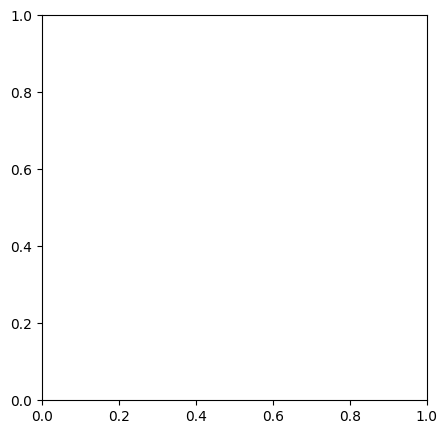

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.imshow(W_noisy, extent=[-5, 5, -5, 5], origin='lower', cmap='RdBu_r')
plt.title("Reshaped Noisy Wigner Function")
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()
plt.show()


Initial W_noisy shape: (1000,)
Total elements in W_noisy: 1000
Reshaped W_noisy to: (25, 40)
Phase-space grid dimensions: (25, 40)


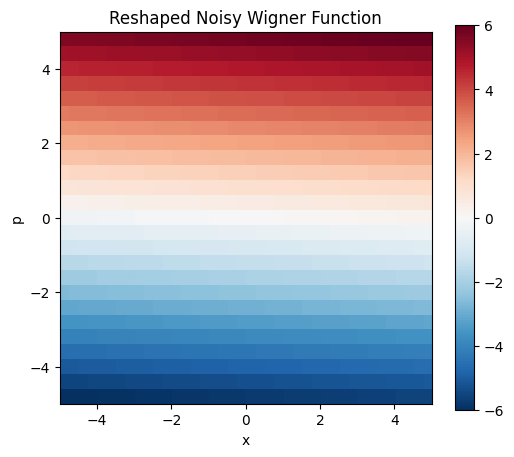

In [12]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

file_path = "noisy_wigner_0.pickle"
with open(file_path, "rb") as f:
    loaded_data = pickle.load(f)

# Assume loaded_data is either a tuple or the array itself
if isinstance(loaded_data, tuple):
    # You might need to inspect the tuple contents if there are multiple elements
    W_noisy = np.array(loaded_data[0])
else:
    W_noisy = np.array(loaded_data)

print("Initial W_noisy shape:", W_noisy.shape)

# Check total number of elements
print("Total elements in W_noisy:", W_noisy.size)

# Now reshape the 1D array to the expected shape, for example, (25, 40)
expected_shape = (25, 40)
if W_noisy.size == np.prod(expected_shape):
    W_noisy = W_noisy.reshape(expected_shape)
    print("Reshaped W_noisy to:", W_noisy.shape)
else:
    print("Warning: the total number of elements does not match the expected shape.")

# Setup phase-space grid according to the reshaped dimensions.
x = np.linspace(-5, 5, expected_shape[0])
y = np.linspace(-5, 5, expected_shape[1])
print("Phase-space grid dimensions:", expected_shape)

# Plot the reshaped Wigner function
plt.figure(figsize=(6, 5))
plt.imshow(W_noisy, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='RdBu_r')
plt.title("Reshaped Noisy Wigner Function")
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()
plt.show()


In [14]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# --- Load the Noisy Wigner Function ---
noisy_file = "noisy_wigner_0.pickle"  # Update with the correct file path
with open(noisy_file, "rb") as f:
    loaded_noisy = pickle.load(f)

# If the loaded data is a tuple, assume its first element holds the noisy Wigner.
if isinstance(loaded_noisy, tuple):
    W_noisy = np.array(loaded_noisy[0])
else:
    W_noisy = np.array(loaded_noisy)

print("Initial W_noisy shape:", W_noisy.shape)
print("Total elements in W_noisy:", W_noisy.size)

# --- Load the Reference (Clean) Quantum State Wigner Function ---
ref_file = "quantum_state_0.pickle"  # Update with the correct file path
with open(ref_file, "rb") as f:
    loaded_ref = pickle.load(f)

if isinstance(loaded_ref, tuple):
    W_ref = np.array(loaded_ref[0])
else:
    W_ref = np.array(loaded_ref)

print("Initial W_ref shape:", W_ref.shape)
print("Total elements in W_ref:", W_ref.size)

# --- Reshape Data if It Is 1D ---
# For this example, we expect a grid shape of (25, 40). Adjust if needed.
expected_shape = (25, 40)
if W_noisy.ndim == 1:
    if W_noisy.size == np.prod(expected_shape):
        W_noisy = W_noisy.reshape(expected_shape)
        print("Reshaped W_noisy to:", W_noisy.shape)
    else:
        print("Warning: W_noisy size does not match expected shape:", np.prod(expected_shape))
else:
    print("W_noisy already has dimensions:", W_noisy.shape)

if W_ref.ndim == 1:
    if W_ref.size == np.prod(expected_shape):
        W_ref = W_ref.reshape(expected_shape)
        print("Reshaped W_ref to:", W_ref.shape)
    else:
        print("Warning: W_ref size does not match expected shape:", np.prod(expected_shape))
else:
    print("W_ref already has dimensions:", W_ref.shape)

# --- Setup the Phase-Space Grid ---
# Using the grid boundaries -5 to 5 for both x and p.
x = np.linspace(-5, 5, W_noisy.shape[0])
y = np.linspace(-5, 5, W_noisy.shape[1])
dx = x[1] - x[0]
dy = y[1] - y[0]
print("Phase-space grid dimensions:", (W_noisy.shape[0], W_noisy.shape[1]))

# --- Compute a Numerical Metric (Mean Squared Error) ---
mse = np.mean((W_noisy - W_ref)**2)
print("Mean Squared Error (MSE) between noisy and reference Wigner functions:", mse)

# --- Plot the Wigner Functions Side by Side for Visual Comparison ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(W_noisy, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='RdBu_r')
plt.title("Noisy Wigner Function")
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(W_ref, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='RdBu_r')
plt.title("Reference (Clean) Wigner Function")
plt.xlabel("x")
plt.ylabel("p")
plt.colorbar()

plt.tight_layout()
plt.show()


Initial W_noisy shape: (1000,)
Total elements in W_noisy: 1000
Initial W_ref shape: (50, 50)
Total elements in W_ref: 2500
Reshaped W_noisy to: (25, 40)
W_ref already has dimensions: (50, 50)
Phase-space grid dimensions: (25, 40)


ValueError: operands could not be broadcast together with shapes (25,40) (50,50) 

In [15]:
import numpy as np
from scipy.linalg import sqrtm

def fidelity(rho, rho_ref):
    sqrt_rho_ref = sqrtm(rho_ref)
    intermediate = sqrt_rho_ref @ rho @ sqrt_rho_ref
    sqrt_intermediate = sqrtm(intermediate)
    fidelity_value = np.trace(sqrt_intermediate)
    return np.real(fidelity_value)**2

# Example: assume both are 10x10 density matrices.
rho = np.random.rand(10,10) + 1j*np.random.rand(10,10)
rho = (rho + rho.conjugate().T) / 2  # Make it Hermitian.
rho = rho / np.trace(rho)

rho_ref = np.zeros((10,10), dtype=complex)
rho_ref[0,0] = 1

F = fidelity(rho, rho_ref)
print("Fidelity between rho and rho_ref:", F)


Fidelity between rho and rho_ref: 0.13231263618799227
